In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


## Importing datasets

In [2]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data wrangling

In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kantor, Mr. Sinai",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Wrangling missing values

In [7]:
df_missing= train_data.isnull()
df_missing.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
for feature in df_missing.columns:
    print(feature)
    print(df_missing[feature].value_counts(), '\n')

PassengerId
False    891
Name: PassengerId, dtype: int64 

Survived
False    891
Name: Survived, dtype: int64 

Pclass
False    891
Name: Pclass, dtype: int64 

Name
False    891
Name: Name, dtype: int64 

Sex
False    891
Name: Sex, dtype: int64 

Age
False    714
True     177
Name: Age, dtype: int64 

SibSp
False    891
Name: SibSp, dtype: int64 

Parch
False    891
Name: Parch, dtype: int64 

Ticket
False    891
Name: Ticket, dtype: int64 

Fare
False    891
Name: Fare, dtype: int64 

Cabin
True     687
False    204
Name: Cabin, dtype: int64 

Embarked
False    889
True       2
Name: Embarked, dtype: int64 



Based on the previous analysis, 3 of 12 columns have missing values:

1. "Cabin" (object):    687/891
1. "Age" (int64):      177 /891
1. "Embarked" (object): 2/891

Replace Nan values by mean in the age columns

In [9]:
age_mean=train_data['Age'].mean()
train_data['Age'].replace(np.nan, age_mean, inplace=True)

Replace Nan values by most frecuent in embarked column

In [10]:
embarked_top= train_data['Embarked'].value_counts().sort_values(ascending=False).index.tolist()[0]
train_data['Embarked'].replace(np.nan, embarked_top, inplace=True)

Most of cabin column values are missing values, so we eliminate this feature.

In [11]:
del(train_data['Cabin'])

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Check theres for missing values

In [13]:
if train_data.isnull().sum().sum() == 0:
    print("There's not missing values in the dataframe")

There's not missing values in the dataframe


### Other transformations

**Getiing the tittle:** The name itself doesn´t apport predictive value to the algorithm, but the person tittle may be different

In [14]:
# Defining a function to extract the title from name

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    return 'NoTitle'

In [15]:
# Defining a list of title : We made this looking for in the "Name" colum

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

In [16]:
# Extract the the tittle from name

train_data['Title']=train_data['Name'].map(lambda x: substrings_in_string(x,title_list))
train_data['Title'].value_counts()

Mr          518
Miss        180
Mrs         129
Master       40
Dr            7
Rev           6
Major         2
Col           2
Capt          1
Don           1
Jonkheer      1
Mme           1
Countess      1
Mlle          1
Ms            1
Name: Title, dtype: int64

We group the less significant titles into the group "other"

In [17]:
other=['Dr','Rev', 'Col', 'Major', 'Don','Capt', 'Mme', 'Ms', 'Jonkheer', 'Countess', 'Mlle']

def change_title(title):
    if title in other:
        return 'other'
    else:
        return title
        
train_data['Title']=train_data['Title'].map(lambda x: change_title(x))
train_data['Title'].value_counts()


Mr        518
Miss      180
Mrs       129
Master     40
other      24
Name: Title, dtype: int64

**Binning the age:** We create a new colums with age grouped in different bins,in the future we'll evaluate what kind of format is most convinient (Continues numerival or Cathegorical)

In [18]:
#stablish the limits

bins = np.linspace(0, max(train_data['Age']),9).astype(np.int)
bins

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [19]:
#create the labels

bins_name=[]

for i in bins[1:]:
    bins_name.append('{}-{}'.format(i-10,i))

bins_name

['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

In [20]:
train_data['Age-binned']=pd.cut(train_data['Age'], bins, labels=bins_name, include_lowest=True)
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age-binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,30-40
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Mr,20-30
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr,50-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master,0-10
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs,20-30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs,10-20


## Exploratory analysis

In [21]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Does the person title has some influence?

In [22]:
grouped2=train_data[['Title','Survived']]
grouped2=grouped2.groupby(['Title'], as_index=False).mean()
grouped2

,Title,Survived
0,Master,0.575000
1,Miss,0.700000
2,Mr,0.158301
3,Mrs,0.790698
4,other,0.375000


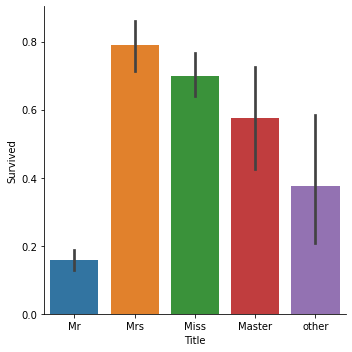

In [23]:
sns.catplot(x='Title', y='Survived', kind='bar', data=train_data)

We could conclude that the title has some relation with the survival rate

### Evaluating the age influence

In [24]:
grouped1= train_data[['Age-binned','Survived']]
grouped1= grouped1.groupby(['Age-binned'], as_index=False).mean()
grouped1.set_index('Age-binned', inplace=True)
grouped1

,Survived
Age-binned,
0-10,0.593750
10-20,0.382609
20-30,0.334152
30-40,0.445161
40-50,0.383721
50-60,0.404762
60-70,0.235294
70-80,0.200000


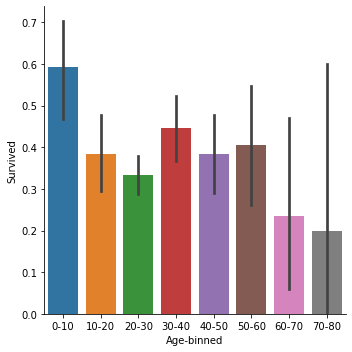

In [25]:
sns.catplot(x='Age-binned', y='Survived', kind='bar', data=train_data)

We could see some patter:
* Children have a great survival rate, while seniors have the lowers survival rate. 
* Between 10 and 60 years old the survival rate is more or less constant. 

In order to reduce the amount of resulting features after the one-hot encoding process, we will group these categories on the categories 'Child', 'Adults', 'Senior'

In [26]:
adults=['10-20','20-30', '30-40','40-50', '50-60']
senior=['60-70', '70-80']

def change_age_bin(age_bin):
    if age_bin in adults:
        return 'adult'
    elif age_bin in senior:
        return 'senior'
    else:
        return 'child'
        
train_data['Age-binned']=train_data['Age-binned'].map(lambda x: change_age_bin(x))
train_data=train_data.rename(columns={'Age-binned':'Seniority'})
train_data['Seniority'].value_counts()


adult     805
child      64
senior     22
Name: Seniority, dtype: int64

### Evaluating the sex influence


In [27]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
grouped3=train_data[['Sex', 'Survived']]
grouped3=grouped3.groupby(['Sex'],as_index=True).mean()
grouped3

,Survived
Sex,
female,0.742038
male,0.188908


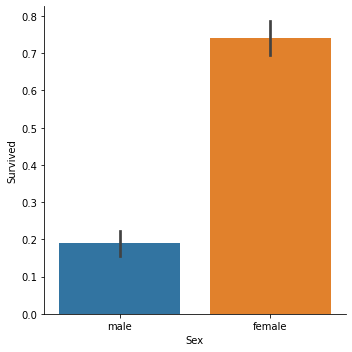

In [29]:
sns.catplot(x='Sex', y='Survived', kind='bar', data=train_data)

The sex have a huge impact on the survival rate

### Evaluating the class influence

In [30]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [31]:
grouped4=train_data[['Pclass','Survived']]
grouped4=grouped4.groupby(['Pclass'],as_index=False).mean()
grouped4

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


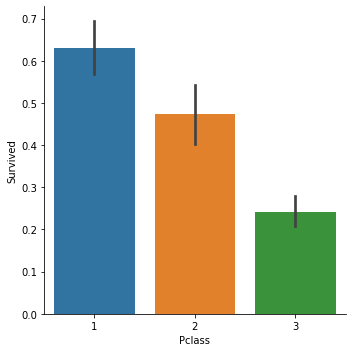

In [32]:
sns.catplot(x='Pclass', y='Survived', kind='bar', data=train_data)

The passenger class has influence on the survival rate

### Evaluating influence of the boarding port

In [33]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
grouped5=train_data[['Embarked', 'Survived']]
grouped5=grouped5.groupby(['Embarked'], as_index=False).mean()
grouped5

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


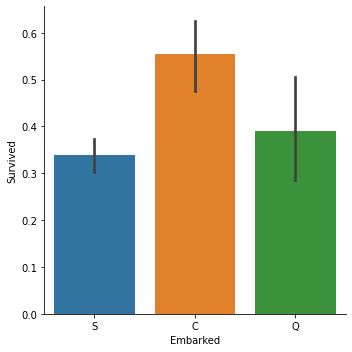

In [35]:
sns.catplot(x='Embarked', y='Survived',kind='bar', data=train_data)

For some particular reason, it seams that people who embarked on Chesburgo are more likely to survived than the rest of people

### Evaluating if relatives presence influences on the survival probability

***Parents and children***

In [36]:
train_data['Parch'].value_counts().sort_index(ascending=True)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

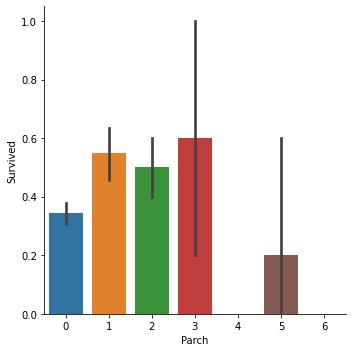

In [37]:
sns.catplot(x='Parch',y='Survived', kind='bar', data=train_data)

In [38]:
grouped6=train_data[['Parch', 'Survived']]

def asc_eva(num_of_asc):
    if num_of_asc==0:
        return 'No'
    else:
        return 'yes'
    
grouped6['Parch']=grouped6['Parch'].map(lambda x: asc_eva(x))
grouped6.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Parch,Survived
0,No,0
1,No,1
2,No,1
3,No,1
4,No,0


In [39]:
grouped6.groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,No,0.343658
1,yes,0.511737


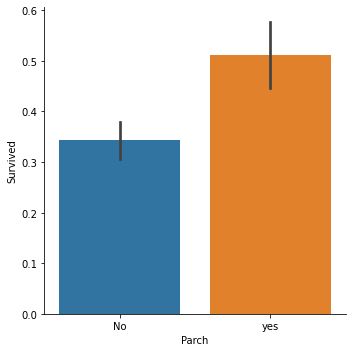

In [40]:
sns.catplot(x='Parch',y='Survived', kind='bar', data=grouped6)

***Siblings and spouses***

In [41]:
train_data['SibSp'].value_counts().sort_index(ascending=True)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

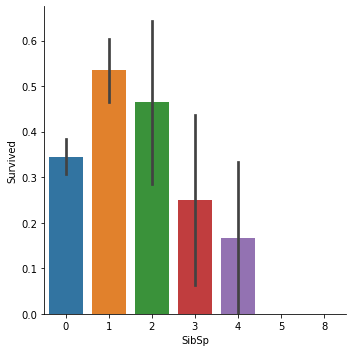

In [42]:
sns.catplot(x='SibSp',y='Survived', kind='bar', data=train_data)

In [43]:
grouped7=train_data[['SibSp', 'Survived']]

def sib_eva(num_of_sib):
    if num_of_sib==0:
        return 'No'
    else:
        return 'yes'
    
grouped7['SibSp']=grouped7['SibSp'].map(lambda x: sib_eva(x))
grouped7.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,SibSp,Survived
0,yes,0
1,yes,1
2,No,1
3,yes,1
4,No,0


In [44]:
grouped7.groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,No,0.345395
1,yes,0.466431


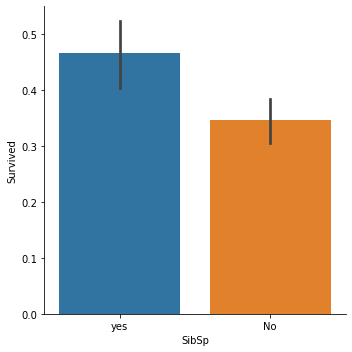

In [45]:
sns.catplot(x='SibSp',y='Survived', kind='bar', data=grouped7)

***Family***

In [46]:
grouped8=train_data[['Parch','SibSp']]
grouped8['Family']=grouped8[['Parch','SibSp']].sum(axis=1)
grouped8['Survived']=train_data['Survived']
grouped8=grouped8[['Family','Survived']]
grouped8.head(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Family,Survived
0,1,0
1,1,1
2,0,1
3,1,1
4,0,0


In [47]:
grouped8['Family'].value_counts().sort_index(ascending=True)

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Family, dtype: int64

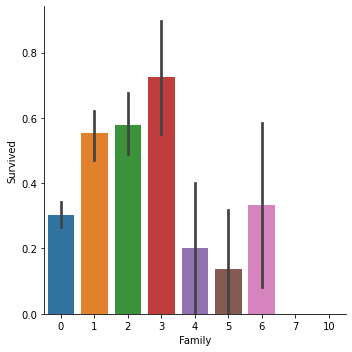

In [48]:
sns.catplot(x='Family', y='Survived', kind='bar', data=grouped8)

In [49]:
def fam_eva(num_of_fam):
    if num_of_fam==0:
        return 'No'
    else:
        return 'Yes'

grouped8['Family']=grouped8['Family'].map(lambda x: fam_eva(x))    
grouped8.head()

,Family,Survived
0,Yes,0
1,Yes,1
2,No,1
3,Yes,1
4,No,0


In [50]:
grouped8.groupby(['Family'], as_index=False).mean()

,Family,Survived
0,No,0.303538
1,Yes,0.505650


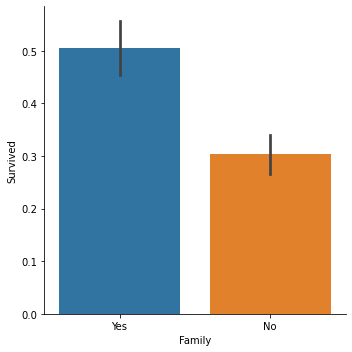

In [51]:
sns.catplot(x='Family', y='Survived', kind='bar', data=grouped8)

We could conclude that the fact of having family onboard or no is has more impact on the survival rate

### Evaluating if travel fare influences the survival rate

In [52]:
grouped9=train_data[['Fare']]
grouped9.describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [53]:
bins_fare=[0, 3.5, 11.0, 31.0, 200.0, 513.0]
bins_fare_labels= ['Low', 'Medium-low', 'Medium-high', 'High','Ourageous']

In [54]:
train_data['Fare level']=pd.cut(train_data['Fare'], bins_fare, labels=bins_fare_labels, include_lowest=True)

In [55]:
train_data['Fare level'].value_counts()

Medium-low     349
Medium-high    305
High           202
Ourageous       20
Low             15
Name: Fare level, dtype: int64

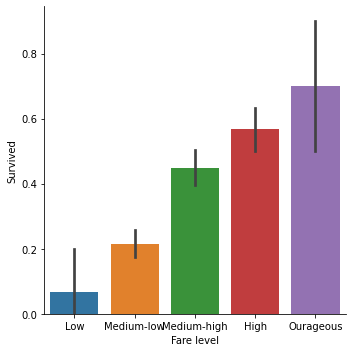

In [56]:
sns.catplot(x='Fare level', y='Survived', kind='bar', data=train_data)

We can see the more money the person spent, the more survival posibilidy they have

### Cross features

### Has a woman with children more survival possibility than one without children?

In [57]:
grouped10=train_data[['Sex', 'Parch', 'Survived']]
grouped10['Parch']=grouped10['Parch'].map(lambda x: asc_eva(x))
grouped10.head(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex,Parch,Survived
0,male,No,0
1,female,No,1


In [58]:
grouped10c=grouped10.groupby(['Sex','Parch'], as_index=False).count()
grouped10c

,Sex,Parch,Survived
0,female,No,194
1,female,yes,120
2,male,No,484
3,male,yes,93


In [59]:
grouped10m=grouped10.groupby(['Sex','Parch'], as_index=False).mean()
grouped10m

,Sex,Parch,Survived
0,female,No,0.788660
1,female,yes,0.666667
2,male,No,0.165289
3,male,yes,0.311828


From this analysis we can conclude two things:
* Contrary to our initial hypothesis, **women without children have a better chance of survival than those who have** 

* The presence of family affects men and women in different ways: The men's odds increases with the presence of a parent/child, whereas the women's odds decreases.


We repeat this analysis with sex/siblings and sex/family to see if this pattern repeat.

### Sex and Sibling/spouses

In [60]:
grouped11=train_data[['Sex', 'SibSp', 'Survived']]
grouped11['SibSp']=grouped11['SibSp'].map(lambda x: sib_eva(x))
grouped11.head(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex,SibSp,Survived
0,male,yes,0
1,female,yes,1


In [61]:
grouped11c=grouped11.groupby(['Sex','SibSp'], as_index=False).count()
grouped11c

,Sex,SibSp,Survived
0,female,No,174
1,female,yes,140
2,male,No,434
3,male,yes,143


In [62]:
grouped11m=grouped11.groupby(['Sex','SibSp'], as_index=False).mean()
grouped11m

,Sex,SibSp,Survived
0,female,No,0.787356
1,female,yes,0.685714
2,male,No,0.168203
3,male,yes,0.251748


### Sex and Family

In [63]:
grouped12=train_data[['Sex', 'SibSp', 'Parch', 'Survived']]
grouped12['Family']=grouped12[['SibSp', 'Parch']].sum(axis=1)
grouped12=grouped12[['Sex','Family', 'Survived']]
grouped12['Family']=grouped12['Family'].map(lambda x: fam_eva(x))
grouped12.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex,Family,Survived
0,male,Yes,0
1,female,Yes,1
2,female,No,1
3,female,Yes,1
4,male,No,0


In [64]:
grouped12c=grouped12.groupby(['Sex','Family'], as_index=False).count()
grouped12c

,Sex,Family,Survived
0,female,No,126
1,female,Yes,188
2,male,No,411
3,male,Yes,166


In [65]:
grouped12m=grouped12.groupby(['Sex','Family'], as_index=False).mean()
grouped12m

,Sex,Family,Survived
0,female,No,0.785714
1,female,Yes,0.712766
2,male,No,0.155718
3,male,Yes,0.271084


Evaluating the three cross features, the one with more impact it's the relation Sex and Parch


In previous analysis we conclude that the presence of relatives on board is associated with a bigger survival probability. After evaluate the relation between the sex and presence of relatives, we could conclude that it's true for men but not por women. So it's covinient to create a new feature that combine this two variable.

Also we saw that, in combinattion, the presence of parents/children apport more predictive power than Siblings/Spouses. So the new feature will cross the features "sex" and "SibSp"

In [66]:
train_data['Parch-binned']=train_data['Parch'].map(lambda x: asc_eva(x))
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Seniority,Fare level,Parch-binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,adult,Medium-low,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,adult,High,No


In [67]:
train_data['Sex-Parch']= train_data['Sex']+train_data['Parch-binned']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Seniority,Fare level,Parch-binned,Sex-Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,adult,Medium-low,No,maleNo
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,adult,High,No,femaleNo
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,adult,Medium-low,No,femaleNo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,adult,High,No,femaleNo
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,adult,Medium-low,No,maleNo


### Features resumee

Original

* Name: String
* Pclass: Cat
* Sex:    Cat
* Age:    Num
* SibSp:  Num
* Parch:  Num
* Ticket: String
* Fare:   Num
* Embar:  Cat

Created

1. Title:  Cat 
1. Seni..: Cat
1. Fare-L: Cat
1. Sex-par:Cat


## Modeling

### 1- Decision Tree

The first model to be traied it's a simple Decision Tree. With this model and with all the model we'll try different selections of features:
* 1- Original features
* 2- New Features

In [68]:
# Importing the necesarry modul from the library SK lean

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [69]:
x1=train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']]
x1=pd.get_dummies(x1)
x1=x1.values
x1[0:5]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  1.    ,  0.    ,
         0.    ,  0.    ,  1.    ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  1.    ,  0.    ,
         0.    ,  0.    ,  1.    ],
       [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ]])

In [70]:
y1= train_data[['Survived']]
y1=y1.values
y1[0:5]

array([[0],
       [1],
       [1],
       [1],
       [0]])

In [71]:
x2=train_data[['Pclass', 'Title', 'Sex-Parch','Seniority','Fare level', 'Embarked']]
x2=pd.get_dummies(x2)
x2=x2.values
x2[0:5]

array([[3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])

In [72]:
y2= train_data[['Survived']]
y2=y2.values
y2[0:5]

array([[0],
       [1],
       [1],
       [1],
       [0]])

In some models we need to decide what parameter use. Thi decision is taken in base of the accuracy for value of the parameter. In order to calculate this accuracy we partition the datasets.

Once the parameters are choosen we train the model with the entire data sets

In [73]:
x1train, x1test, y1train, y1test= train_test_split(x1, y1, test_size=0.3)

In [74]:
x2train, x2test, y2train, y2test= train_test_split(x2, y2, test_size=0.3)

**1- Simple Decision Tree- Orginal features**

In [75]:
#Create and trin the model

DecTree1= DecisionTreeClassifier(criterion='entropy')
DecTree1.fit(x1,y1)

DecisionTreeClassifier(criterion='entropy')

In [76]:
# Create and train the model

DecTree2= DecisionTreeClassifier(criterion='entropy')
DecTree2.fit(x2, y2)

DecisionTreeClassifier(criterion='entropy')

### 2- K nearest neighbors

**3- K Nearest Neighbors - Original features**

In [77]:
# Importing libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [78]:
# Preparing the datasets: In algoritm like this where the decision 
# is taken by distance, it's necessary process of normalization

x3train=preprocessing.StandardScaler().fit(x1train).transform(x1train.astype(float))
x3test=preprocessing.StandardScaler().fit(x1test).transform(x1test.astype(float))
y3train=y1train
y3test=y1test

x3train[0:2]
x3test[0:2]

array([[ 0.82771749,  0.00327494, -0.48592244, -0.52333416, -0.48677211,
        -0.6992059 ,  0.6992059 , -0.46116123, -0.29904999,  0.58884095],
       [ 0.82771749, -1.97890036,  1.91089744,  0.53120385, -0.22922438,
         1.43019388, -1.43019388, -0.46116123, -0.29904999,  0.58884095]])

The parameter k in the model is arbitrary value we must introduce, so we iterate through different values of k and choice the one whose model get the greatest accuracy score.

In [79]:
ks=31
k_accuracy1=[]

for n in range(1, ks):
    Kmodel3=KNeighborsClassifier(n_neighbors= n).fit(x3train, y3train)
    y_hat3=Kmodel3.predict(x3test)
    accuracy=round(metrics.accuracy_score(y3test, y_hat3),2)
    k_accuracy1.append(accuracy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

In [80]:
#Determine the best K
TheBestK1=k_accuracy1.index(max(k_accuracy1)) +1
print('The best k is: ', TheBestK1)

The best k is:  2


In [81]:
# Train the model

KNeigh3=KNeighborsClassifier(n_neighbors= TheBestK1).fit(x1, y1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**4- K nearest neighbogh - new features**

In [82]:
#Preparing the datasets

x4train=preprocessing.StandardScaler().fit(x2train).transform(x2train.astype(float))
x4test=preprocessing.StandardScaler().fit(x2test).transform(x2test.astype(float))
y4train=y2train
y4test=y2test

x4train[0:2]
x4test[0:2]

array([[-0.33182856, -0.22578838, -0.54284988, -1.11897312, -0.40021639,
         5.70087713, -0.53131596, -0.41885391,  0.95618289, -0.34833735,
         0.32075015, -0.26832816, -0.16376789, -0.18641093, -0.77768272,
         1.41818051, -0.54284988, -0.1754116 , -0.47301616, -0.26024812,
         0.57160535],
       [ 0.86992892, -0.22578838, -0.54284988,  0.89367652, -0.40021639,
        -0.1754116 , -0.53131596, -0.41885391,  0.95618289, -0.34833735,
         0.32075015, -0.26832816, -0.16376789, -0.18641093,  1.28587143,
        -0.70512886, -0.54284988, -0.1754116 , -0.47301616, -0.26024812,
         0.57160535]])

In [83]:
# K selection

ks=31
k_accuracy2=[]

for n in range(1, ks):
    Kmodel4=KNeighborsClassifier(n_neighbors= n).fit(x4train, y4train)
    y_hat4=Kmodel4.predict(x4test)
    accuracy=round(metrics.accuracy_score(y4test, y_hat4),2)
    k_accuracy2.append(accuracy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: Data

In [84]:
#Determine the best K

TheBestK2=k_accuracy2.index(max(k_accuracy2)) +1
print('The best k is: ', TheBestK2)

The best k is:  2


In [85]:
# Train the model and calculate its accuracy

KNeigh4=KNeighborsClassifier(n_neighbors= TheBestK2).fit(x2, y2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### 3- Support Vector Machine (SVM)

SVM classify the data mapping it into a higher dimensional space and use an hyperplane as decisor maker. The mathematical funtion used for the transformation is known as the kernell funtion and can be of different types. We'll try with 4 different types of function and evaluate their perfomance:

1. Linear 
1. Polynomial
1. Radial Basis function (RBF)
1. Sigmoid

In [86]:
# Import functions

from sklearn import svm

5 -  SVM - original features

In [87]:
# Prepare the datasets

x5train=preprocessing.StandardScaler().fit(x1train).transform(x1train.astype(float))
x5test=preprocessing.StandardScaler().fit(x1test).transform(x1test.astype(float))
y5train= y1train
y5test= y1test

In [88]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
accuracies1={'linear': 0 , 'poly': 0 , 'rbf':0, 'sigmoid':0}

for k in kernels:
    SVMmodel=svm.SVC(kernel=k)
    SVMmodel.fit(x5train,y5train)
    y_hat5=SVMmodel.predict(x5test)
    accuracy=metrics.accuracy_score(y_hat5, y5test)
    accuracies1[k]=round(accuracy,3)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [89]:
# Determine the best kernel

function1= max(accuracies1, key= lambda key: accuracies1[key])
print('The best funtion is: ', function1)

The best funtion is:  rbf


In [90]:
SVM5=svm.SVC(kernel=function1)
SVM5.fit(x1,y1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

6 - SVM - New features

In [91]:
# Prepare the datasets

x6train=preprocessing.StandardScaler().fit(x2train).transform(x2train.astype(float))
x6test=preprocessing.StandardScaler().fit(x2test).transform(x2test.astype(float))
y6train= y2train
y6test= y2test

In [92]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
accuracies2={'linear': 0, 'poly':0, 'rbf':0, 'sigmoid':0}

for k in kernels:
    SVMmodel=svm.SVC(kernel=k)
    SVMmodel.fit(x6train,y6train)
    y_hat6=SVMmodel.predict(x6test)
    accuracy=metrics.accuracy_score(y_hat6, y6test)
    accuracies2[k]=accuracy

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [93]:
# Determine the best kernel

function2= max(accuracies2, key= lambda key: accuracies2[key])
print('The best funtion is: ', function2)

The best funtion is:  rbf


In [94]:
SVM6=svm.SVC(kernel=function2)
SVM6.fit(x2,y2)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

### 4- Random forest model

The random forest algoritm is compose of a serie of decision trees. Each tree makes their own prediction and the model output is the most choosen label

In [95]:
from sklearn.ensemble import RandomForestClassifier

7- Random forest - Original features

In [96]:
RanFor7=RandomForestClassifier(n_estimators= 100, max_depth=6, random_state=1)
RanFor7.fit(x1,y1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=6, random_state=1)

8 - Random forest - New features

In [97]:
RanFor8=RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)
RanFor8.fit(x2,y2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=6, random_state=1)

## Making predictions

### Preparing the test set

In [98]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [99]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [100]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [101]:
# Delaing with missing values
age_mean=test_data['Age'].mean()
test_data['Age'].replace(np.nan, age_mean, inplace=True)

fare_mean=test_data['Fare'].mean()
test_data['Fare'].replace(np.nan, fare_mean, inplace=True)

del(test_data['Cabin'])


# Title
test_data['Title']=test_data['Name'].map(lambda x: substrings_in_string(x,title_list))
test_data['Title']=test_data['Title'].map(lambda x: change_title(x))

# Seniority
test_data['Age-binned']=pd.cut(test_data['Age'], bins, labels=bins_name, include_lowest=True)
test_data['Age-binned']=test_data['Age-binned'].map(lambda x: change_age_bin(x))
test_data=test_data.rename(columns={'Age-binned':'Seniority'})

# Fare level
test_data['Fare level']=pd.cut(test_data['Fare'], bins_fare, labels=bins_fare_labels, include_lowest=True)

# Sex- Parch
test_data['Parch-binned']=test_data['Parch'].map(lambda x: asc_eva(x))

test_data['Sex-Parch']= test_data['Sex']+test_data['Parch-binned']
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Seniority,Fare level,Parch-binned,Sex-Parch
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,adult,Medium-low,No,maleNo
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,adult,Medium-low,No,femaleNo


In [102]:
x1cal=test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']]
x1cal=pd.get_dummies(x1cal)
x1cal=x1cal.values
x1cal[0:3]

array([[ 3.    , 34.5   ,  0.    ,  0.    ,  7.8292,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ],
       [ 3.    , 47.    ,  1.    ,  0.    ,  7.    ,  1.    ,  0.    ,
         0.    ,  0.    ,  1.    ],
       [ 2.    , 62.    ,  0.    ,  0.    ,  9.6875,  0.    ,  1.    ,
         0.    ,  1.    ,  0.    ]])

In [103]:
x2cal=test_data[['Pclass', 'Title', 'Sex-Parch','Seniority','Fare level', 'Embarked']]
x2cal=pd.get_dummies(x2cal)
x2cal=x2cal.values
x2cal[0:3]

array([[3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]])

### Predicting the destiny of the passenger on the test set

In [104]:
prediction1=DecTree1.predict(x1cal)
output1=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':prediction1})
output1.to_csv('Tit_1_submission1.csv', index=False)

prediction2=DecTree2.predict(x2cal)
output2=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':prediction2})
output2.to_csv('Tit_1_submission2.csv', index=False)

prediction3=KNeigh3.predict(x1cal)
output3=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':prediction3})
output3.to_csv('Tit_1_submission3.csv', index=False)

prediction4=KNeigh4.predict(x2cal)
output4=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':prediction4})
output4.to_csv('Tit_1_submission4.csv', index=False)

prediction5=SVM5.predict(x1cal)
output5=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':prediction5})
output5.to_csv('Tit_1_submission5.csv', index=False)

prediction6=SVM6.predict(x2cal)
output6=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':prediction6})
output6.to_csv('Tit_1_submission6.csv', index=False)

prediction7=RanFor7.predict(x1cal)
output7=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':prediction7})
output7.to_csv('Tit_1_submission7.csv', index=False)

prediction8=RanFor8.predict(x2cal)
output8=pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived':prediction8})
output8.to_csv('Tit_1_submission8.csv', index=False)

print('Submissions were successfully saved')

Submissions were successfully saved
